![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://cdn-images-1.medium.com/max/1024/1*tPpvEulF6HT2l8fshu0DzA.jpeg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Titanic - Machine Learning from Disaster (Kaggle)


we will use **Machine Learning** to create a model that predicts which passengers survived the Titanic shipwreck. (Database taken from the [Kaggle](https://www.kaggle.com/) Titanic Competition)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1- Exploratory Data Analysis (EDA)

### A- Loading libraries. Hands on!

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### B- Loading our data:

The data used for this problem has been previously filted and sorted. We will feed our ML model wit the **'train_data'** and test it with out **'test_data'.**

In [7]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### C- A glance at the data:

Let's pull out one to one **train_data** and **test_data** features, So we can compaire both:

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can notice that both files have the same columns, except for the colum 'survice' in **train_data**. This column does not appear in the file **test_data** and we must calculate it.

also, 

**survival:**    Survival (0 = No; 1 = Yes)           
**PassengerId:** Unique Id of a passenger.           
**pclass:**    Ticket class               
**sex:**    Sex     
**Age:**    Age in years     
**sibsp:**    # of siblings / spouses aboard the Titanic     
**parch:**    # of parents / children aboard the Titanic     
**ticket:**    Ticket number     
**fare:**    Passenger fare     
**cabin:**    Cabin number     
**embarked:**    Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [23]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


We can also see that the total of records are 1309, and this information was separated into: **train_data (from 1-891)**, and **test_data (892-1309)**. It would be interesing to see the kind of criterios use to separe the info in this simple way, instead of a more elaborated way,  since this might lead to not good bias in the ML model.

In [38]:
train_data.shape

(891, 12)

In [39]:
test_data.shape

(418, 14)

**train_data** is showing me 3 columns more... let's delete them:

In [40]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surive,Survive,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NA,NA,NA
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NA,NA,NA
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NA,NA,NA
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NA,NA,NA
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NA,NA,NA


In [43]:
test_data= test_data.drop(['Surive','Survive','Survived'],axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now,let's check again shape:

In [45]:
train_data.shape

(891, 12)

In [44]:
test_data.shape

(418, 11)

In [46]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Let's check how different is the distribution of values of those variables that might be correlated to the posiblility of survive: Pclass, Age, SibSp, and  Parch:


|TRAIN-TEST||Pclass||Age||SibSp||Parch|
|---||---||---||---||---|
|mean||2.30 - 2.26||29.69 - 30.27||0.52 - 0.44||0.38 - 0.39|
|std||0.83 - 0.84||14.52 - 14.18||1.10 - 0.89||0.8 - 0.98|
|50%||3 - 3||28 - 27||0 - 0||0 - 0|


We can see that in all 4 cathegories, the data is pretty much well distributed, so, the way picked to divide the data into _**train**_ and _**test**_ was correct.

In [35]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [49]:
test_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [37]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [50]:
test_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [38]:
train_data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
B19            1
E36            1
A7             1
B79            1
D9             1
Name: Cabin, Length: 147, dtype: int64

In [51]:
test_data['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
E34                2
A34                2
C80                2
                  ..
B24                1
D28                1
C51                1
E39 E41            1
A11                1
Name: Cabin, Length: 76, dtype: int64

In [39]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
test_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In general terms, we could notice that the info is well distribute in each category for **train** and **test** data.

### Column organizacion for train_data.csv  & test_data.csv 

_1- Column distribution:_

**Passengers-data** is provided through **6** columns (Pclass, Name, Sex, Age, SibSp, Parch)

**Boarding-passengers- data** is provided through **5** columns (PassengerId, Ticket, Fare, Cabin, Embarked)

**Event-data** is provided through **1** columns (Survived)

For a total of **12** columns and **891** passengers.

_2- Column ranges/organization:_

In **Passengers-data** we can see that the averages for Pclass, Age, SibSp, and Parch are: 2.31 (most of people were wealthy), 29.7 (the 50% of people were withinh 20-40 years old), 0.52 (1 out of two people had a brother/partner of board) and 0.38 (38% of people had still their parents/children aboard)

In **Boarding-passengers- data** we can see that most people embarked on S = Southampton.

_3- Columns AXE of analysis:_

The Axe column in the table is **SURVIVED**. we will use this one to evaluate the correlation of other columns/groups (Passengers-data and Boarding-passengers-data).

Intuitively is clear that all **Passengers-data**(Pclass, Name, Sex, Age, SibSp, Parch) have direct influence in the possibility of surviving, let's transform that intution into numbers and let's try to rank them.

Finally, let's define if **Boarding-passengers-data** (PassengerId, Ticket, Fare, Cabin, Embarked) has any influence in the possibility of surviving.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### D- Analysis and visualization:

#### D.1. Numerical analysis and visualization

##### D.1.1 Let's visualize several series.

In [54]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
boxplot_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch','Fare']

PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

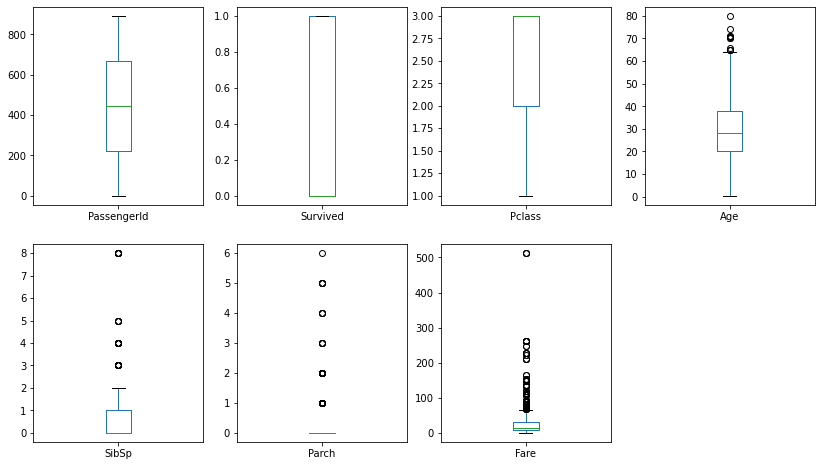

In [59]:
train_data[boxplot_cols].plot(kind='box', subplots=True, layout=(2,4), figsize=(14,8))

* 50% of the Passeger class (Pclass) were between 2 and 3. 
* 50% of the passenger age were betweeen 20 and 40.
* 50% of the people had 0-1 siblins, spouse aboard.
* the amount of parents, children per passenger was so diverse.
* Passenger fare had values way above the mean. Some very luxurious people were on the ship.

##### D.1.2 Let's pick one of the series to make a deeper analysis

We'll analyze the _'Fare'_ column:

In [61]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [62]:
train_data['Fare'].median()

14.4542

In [64]:
train_data['Fare'].mean()

32.2042079685746

_**BOX Diagrams**_

<AxesSubplot:>

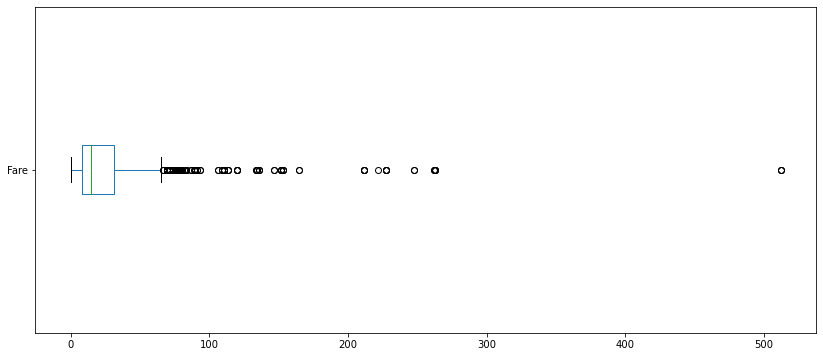

In [65]:
train_data['Fare'].plot(kind='box', vert=False, figsize=(14,6))

_**DENSITY diagram:**_

<AxesSubplot:ylabel='Density'>

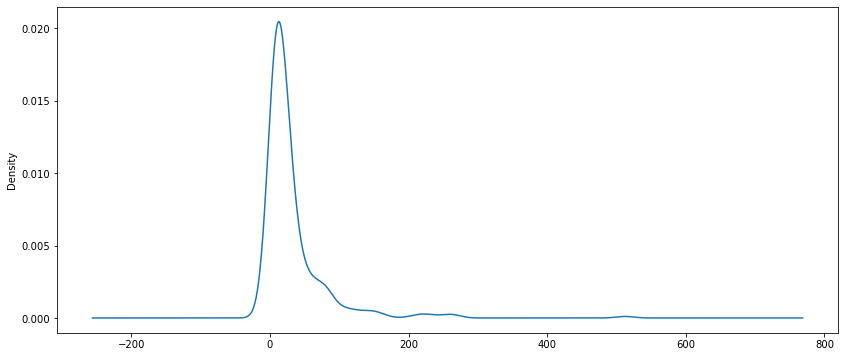

In [66]:
train_data['Fare'].plot(kind='density', figsize=(14,6))

_**(DENSITY + mean + median) diagram:**_

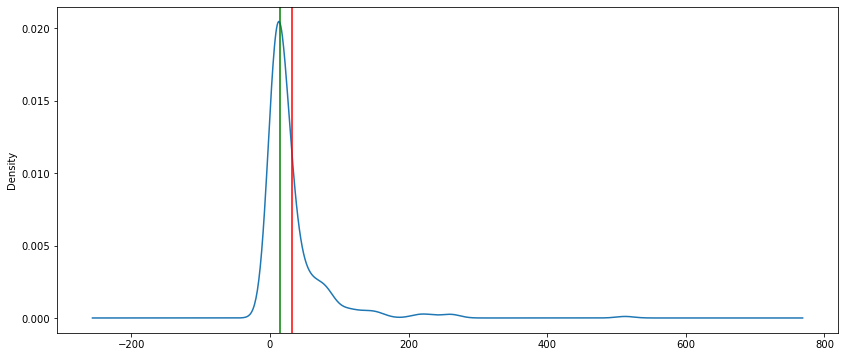

In [67]:
ax = train_data['Fare'].plot(kind='density', figsize=(14,6))
ax.axvline(train_data['Fare'].mean(), color='red')
ax.axvline(train_data['Fare'].median(), color='green')

The density chart is skewed towards the right, since the top values are way higher than the rest

_**HISTOGRAM diagram:**_

Text(0.5, 0, 'Fare - GBP')

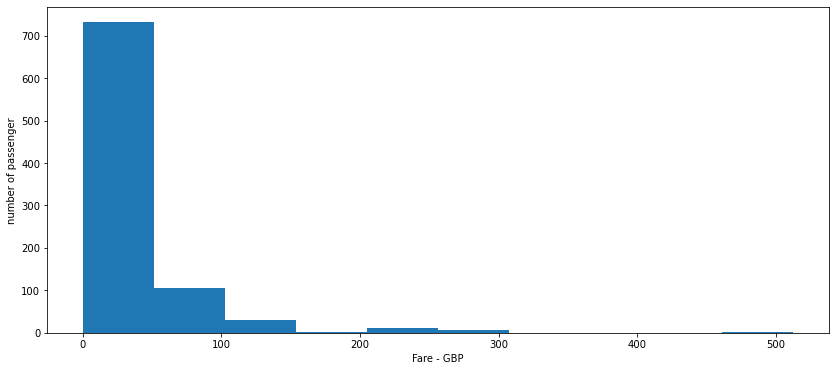

In [4]:
ax = train_data['Fare'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('number of passenger')
ax.set_xlabel('Fare - GBP')

#### D.2. Categorical analysis and visualization

##### D.2.1 Let's analyze the LOCATION COLUMNS, _Country and State_ :

In [85]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


_**PIE CHARTS:**_

<AxesSubplot:ylabel='Survived'>

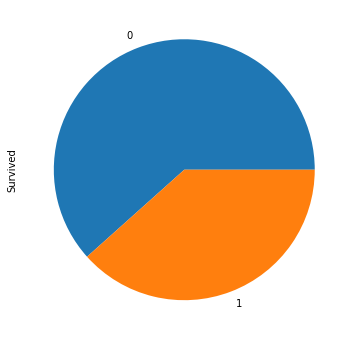

In [87]:
train_data['Survived'].value_counts().plot(kind='pie', figsize=(6,6))

Let's remember: 0 = No Survival ; 1 = Yes, Survival.

<AxesSubplot:ylabel='Sex'>

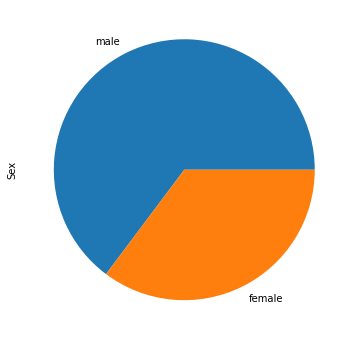

In [88]:
train_data['Sex'].value_counts().plot(kind='pie', figsize=(6,6))

<AxesSubplot:ylabel='Embarked'>

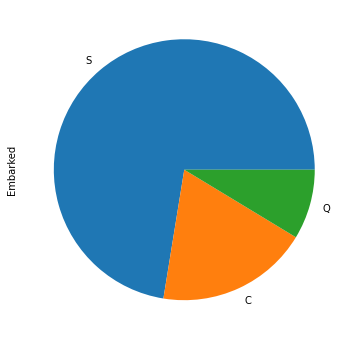

In [90]:
train_data['Embarked'].value_counts().plot(kind='pie', figsize=(6,6))

Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 2- FEATURE ENGINEERING

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### A- Relationship between the columns:

Can we find any significant relationship?

In [5]:
corr = train_data.corr(method='pearson')
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


_**CORRELATION MAP:**_

<AxesSubplot:>

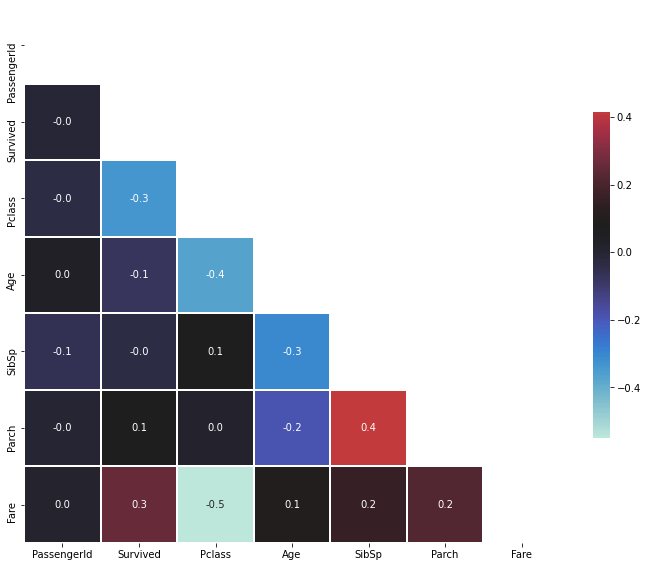

In [8]:
mask = np.triu(corr)
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, linewidths=1, annot = True, square = True, mask=mask, fmt='0.1f', center=0.08, cbar_kws={'shrink':0.5})

ok, according to the _Pearson_ Correlation map, the feature with more incindente in the probability of surviving was 'Fare'. Then comes Parch.

Now, let's introduce withing the correlation analisys 'sex' and 'Embarked', to see if there is any influence. For doing so , let's change any value S,C,Q for: S=1, C=3, and Q=3. And in the case of sex, let's change Male:1 and female:2.

In [11]:
train_data['SexN'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 2)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [21]:
train_data['EmbarkedN'] = (
    np.select(
        condlist = [train_data['Embarked'] == 'C', train_data['Embarked'] == 'Q'],
        choicelist=[2, 3],
        default=[1]))
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexN,EmbarkedN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,2


Now, let's do once again the correlation:

In [22]:
corrN = train_data.corr(method='pearson')
corrN

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexN,EmbarkedN
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.045702
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.010171
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.078665
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.062142
SexN,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.116569
EmbarkedN,-0.030467,0.106811,0.045702,0.010171,-0.059961,-0.078665,0.062142,0.116569,1.000000


<AxesSubplot:>

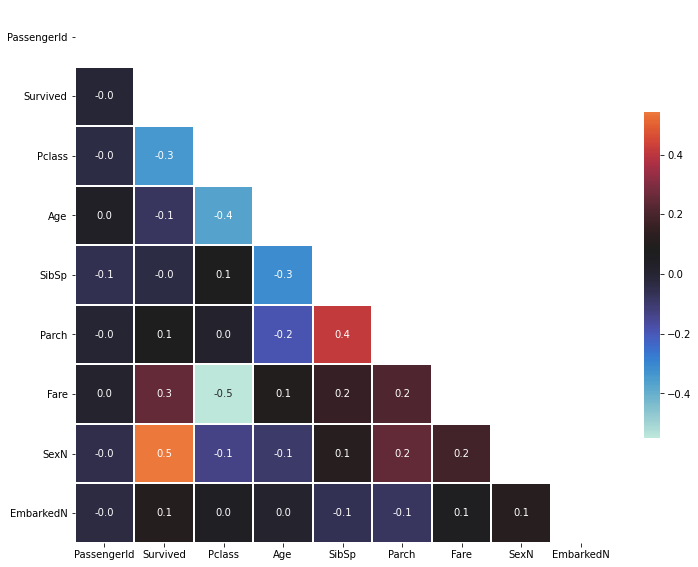

In [25]:
mask = np.triu(corrN)
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corrN, linewidths=1, annot = True, square = True, mask=mask, fmt='0.1f', center=0.08, cbar_kws={'shrink':0.5})

ok, according to the _Pearson_ Correlation map, the rank of features with more correlation to survived where: SexN, Fare, EmbarkedN, Parch, Sibsp, age, Pclass. Now, let's draw the scatter plots:

_**SCATTER PLOT (Survived Vs SexN)**_

<AxesSubplot:xlabel='SexN', ylabel='Survived'>

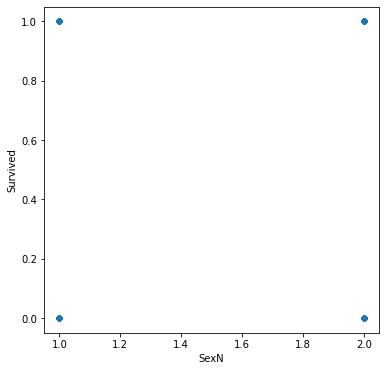

In [26]:
train_data.plot(kind='scatter', x='SexN', y='Survived', figsize=(6,6))

_**SCATTER PLOT (Survived Vs Fare)**_

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

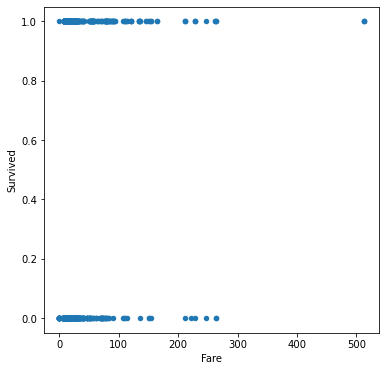

In [27]:
train_data.plot(kind='scatter', x='Fare', y='Survived', figsize=(6,6))

_**SCATTER PLOT (Survived Vs EmbarkedN)**_

<AxesSubplot:xlabel='EmbarkedN', ylabel='Survived'>

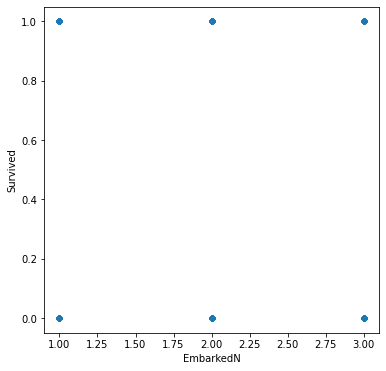

In [28]:
train_data.plot(kind='scatter', x='EmbarkedN', y='Survived', figsize=(6,6))

_**SCATTER PLOT (Survived Vs Parch)**_

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

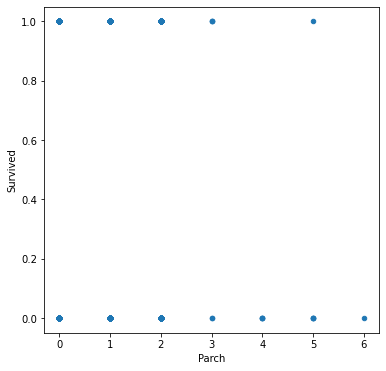

In [29]:
train_data.plot(kind='scatter', x='Parch', y='Survived', figsize=(6,6))

_**SCATTER PLOT (Survived Vs Sibsp)**_

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

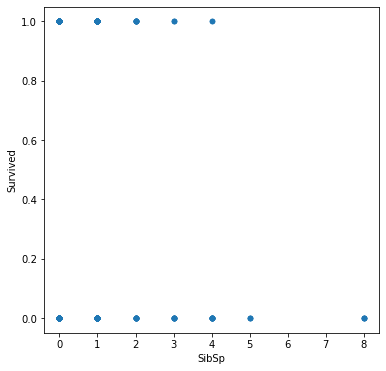

In [31]:
train_data.plot(kind='scatter', x='SibSp', y='Survived', figsize=(6,6))

_**SCATTER PLOT (Survived Vs age)**_

<AxesSubplot:xlabel='Age', ylabel='Survived'>

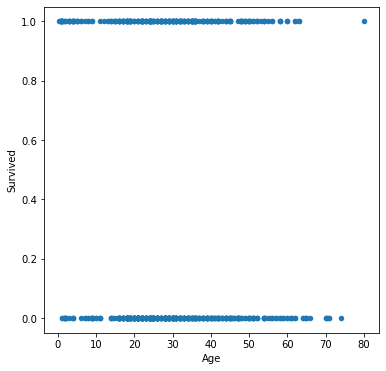

In [33]:
train_data.plot(kind='scatter', x='Age', y='Survived', figsize=(6,6))

_**SCATTER PLOT (Survived Vs Pclass)**_

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

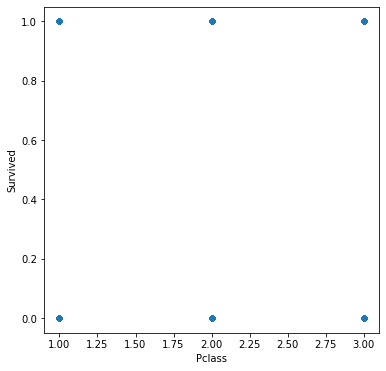

In [34]:
train_data.plot(kind='scatter', x='Pclass', y='Survived', figsize=(6,6))

After drawing the scatter plots, we can state some **HYPOTHESIS**:
   * SexN: female, the higher the probblity of survive.
   * Fare: the higher the number, the higer the probability of surviving.
   * EmbarkedN: there is not strong relation.
   * Parch:the higher the number, the less probability to survive.
   * Sibsp:the higher the number, the less probability to survive.
   * Age: there is not strong relation, though, the older, the higher the probability of survive.
   * Pclass: there is not strong relation.

Now, let's calculate some percentages related to the column Survive, so support a bit the hypothesis stated above:

   * _**SexN**_:

In [40]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [37]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


   * SexN: female, the higher the probblity of survive.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### B- Building the prediction Model:

We want to use a Classifier easy to read and understand, a interpretable classifier, that we can visualize how it works. For that reason we chosed a Random Forest Classifier:

<img src="https://miro.medium.com/max/1400/1*hmtbIgxoflflJqMJ_UHwXw.jpeg"
    style="width:800px; float: center; margin: 0 40px 40px 40px;"></img>

Now, the feature with the most influence on the Survived column, according to our data analysis where: Sex, Fare (let's pick PClass since the floats in Fare are too long) and Parch. Let's feed our model with those features:

In [8]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Sex", "Pclass", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
from six import StringIO

In [9]:
predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,